<a href="https://colab.research.google.com/github/Almehedi06/testrepo2/blob/main/P2_BTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
 
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)
 
url = 'https://drive.google.com/file/d/1orYY1N1KJTD-cpPXJAT6yFnEWt3xxy1C/view?usp=sharing'
raw_dataset = pd.read_csv(url, error_bad_lines=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/P2/trial_event.csv')

In [ ]:
df[['Precipitation']] = df[['Precipitation']]+1

In [ ]:
df[['Recession_Rate']] = df[['Recession_Rate']]+1

In [ ]:
df['Recession_Rate'].max()

75.16

In [ ]:
df['Precipitation'].max()

54

In [ ]:
df.head(10)

,Precipitation,Recession_Rate
0,1,0.0
1,1,0.0
2,3,0.0
3,0,0.0
4,0,0.0
5,1,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,1,0.0


In [ ]:
df.shape

(46346, 2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.lineplot(x = 'Datetime', y = 'Recession_Rate',data = df)

df['Recession_Rate']

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
46341    0.00
46342    0.29
46343    1.01
46344    0.14
46345    0.00
Name: Recession_Rate, Length: 46346, dtype: float64

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Recession_Rate']
Predictors=['Precipitation']
#Predictors=['Precipitation', 'Temp_Air', 'Temp_Moist', 'Soil_MC', 'Soil_Cond', 'Water_Depth']
 
X=df[Predictors].values
y=df[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
#y=(y-y.min())/(y.max()-y.min())

 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37076, 1)
(37076, 1)
(9270, 1)
(9270, 1)


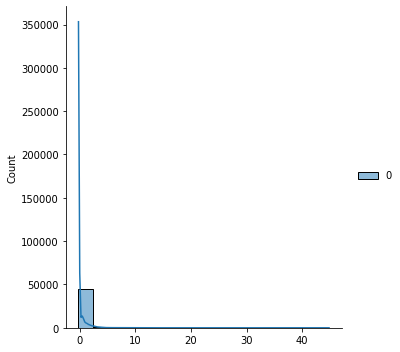

In [ ]:
sns.displot(y, kde = True)

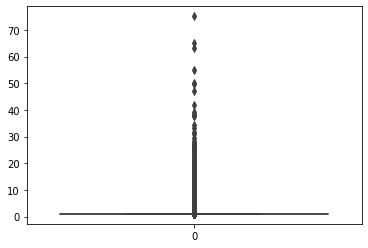

In [ ]:
sns.boxplot(data=df['Recession_Rate'])

In [ ]:
df['Recession_Rate'].min()

0.0

In [ ]:
X.max()

38.78389702729474

In [ ]:
X

array([[ 0.4161403 ],
       [ 0.4161403 ],
       [ 1.89182325],
       ...,
       [-0.32170118],
       [ 0.4161403 ],
       [ 0.4161403 ]])

In [ ]:
y

array([[-0.24991631],
       [-0.24991631],
       [-0.24991631],
       ...,
       [ 0.36433729],
       [-0.16477225],
       [-0.24991631]])

In [ ]:
# Installing required libraries
!pip install tensorflow
!pip install keras

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 100, verbose=1)

Epoch 1/100
1854/1854 [==============================] - 3s 1ms/step - loss: 0.9292
Epoch 2/100
1854/1854 [==============================] - 3s 1ms/step - loss: 0.8688
Epoch 3/100
1854/1854 [==============================] - 3s 1ms/step - loss: 0.8485
Epoch 4/100
1854/1854 [==============================] - 3s 1ms/step - loss: 0.8398
Epoch 5/100
1854/1854 [==============================] - 3s 1ms/step - loss: 0.8343
Epoch 6/100
1854/1854 [==============================] - 3s 1ms/step - loss: 0.8303
Epoch 7/100
1854/1854 [==============================] - 3s 1ms/step - loss: 0.8270
Epoch 8/100
1854/1854 [==============================] - 3s 1ms/step - loss: 0.8246
Epoch 9/100
1854/1854 [==============================] - 3s 1ms/step - loss: 0.8226
Epoch 10/100
1854/1854 [==============================] - 3s 1ms/step - loss: 0.8208
Epoch 11/100
1854/1854 [==============================] - 3s 1ms/step - loss: 0.8193
Epoch 12/100
1854/1854 [==============================] - 3s 1ms/step - lo

KeyboardInterrupt: ignored

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 10, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,Precipitation,Price,PredictedPrice
0,1.0,1.0,1.160720
1,2.0,1.0,1.803732
2,1.0,1.0,1.160720
3,1.0,1.0,1.160720
4,1.0,1.0,1.160720


In [ ]:
df.head(5)

,Datetime,Precipitation,Temp_Air,Temp_Moist,Soil_MC,Soil_Cond,Water_Depth,Recession_Rate
0,2014-01-05 09:50:00,0.01,-0.438,2.1160,0.347396,0.0236,0.41,0.0
1,2014-01-05 09:55:00,0.01,-0.385,2.0960,0.347396,0.0238,0.41,0.0
2,2014-01-05 10:00:00,0.03,-0.310,2.1108,0.347396,0.0236,0.41,0.0
3,2014-01-05 10:05:00,0.00,-0.304,2.1040,0.347126,0.0238,0.41,0.0
4,2014-01-05 10:10:00,0.00,-0.255,2.0960,0.347666,0.0236,0.41,0.0


In [ ]:
df['Recession_Rate']*(-1)

0       -0.000
1       -0.000
2       -0.000
3       -0.000
4       -0.000
         ...  
46341   -0.000
46342   -0.288
46343   -1.008
46344   -0.144
46345   -0.000
Name: Recession_Rate, Length: 46346, dtype: float64

In [ ]:
df['Recession_Rate']=df['Recession_Rate'][df['Recession_Rate'] < 0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Recession_Rate']

0        0
1        0
2        0
3        0
4        0
        ..
46341    0
46342    0
46343    0
46344    0
46345    0
Name: Recession_Rate, Length: 46346, dtype: int64

In [ ]:
df['Recession_Rate'].max()

0

In [ ]:
df['Recession_Rate']

0        1.00
1        1.00
2        1.00
3        1.00
4        1.00
         ... 
46341    1.00
46342    1.29
46343    2.01
46344    1.14
46345    1.00
Name: Recession_Rate, Length: 46346, dtype: float64

In [ ]:
from google.colab import files
df.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_test, (-1,1))

scaler_x = MinMaxScaler()

scaler_y = MinMaxScaler()


print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()


In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 2670)              24030     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2671      
Total params: 26,773
Trainable params: 26,773
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)

Epoch 1/30


ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler


# Or better yet: use a pipeline!
from sklearn.pipeline import make_pipeline


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 

In [ ]:
sgdr = SGDRegressor()
print(sgdr)

SGDRegressor()


In [ ]:
sgdr.fit(X_train, y_train)
score = sgdr.score(X_train, y_train)
print("R-squared:", score)

ValueError: ignored

In [ ]:
df[['Recession_Rate']] = df[['Recession_Rate']].round(2)

In [ ]:
df[['Water_Depth']] = df[['Water_Depth']].round(2)

df[['Soil_Cond']] = df[['Soil_Cond']].round(2)

df[['Soil_MC']] = df[['Soil_MC']].round(2)

df[['Temp_Moist']] = df[['Temp_Moist']].round(2)

df[['Temp_Air']] = df[['Temp_Air']].round(2)

df[['Precipitation']] = df[['Precipitation']].round(2) 	 

In [ ]:
df.head()

,Datetime,Precipitation,Temp_Air,Temp_Moist,Soil_MC,Soil_Cond,Water_Depth,Recession_Rate
0,1/5/2014 9:50,0.01,-0.44,2.12,0.35,0.02,0.41,0.0
1,1/5/2014 9:55,0.01,-0.38,2.10,0.35,0.02,0.41,0.0
2,1/5/2014 10:00,0.03,-0.31,2.11,0.35,0.02,0.41,0.0
3,1/5/2014 10:05,0.00,-0.30,2.10,0.35,0.02,0.41,0.0
4,1/5/2014 10:10,0.00,-0.26,2.10,0.35,0.02,0.41,0.0


In [ ]:
df['Recession_Rate'].min()

0.0

In [ ]:
df[['Water_Depth']] = df[['Water_Depth']]*100

df[['Soil_Cond']] = df[['Soil_Cond']]*100

df[['Soil_MC']] = df[['Soil_MC']]*100

df[['Temp_Moist']] = df[['Temp_Moist']]*100

df[['Temp_Air']] = df[['Temp_Air']]*100

df[['Precipitation']] = df[['Precipitation']]*100

In [ ]:
df.head(10)

,Datetime,Precipitation,Temp_Air,Temp_Moist,Soil_MC,Soil_Cond,Water_Depth,Recession_Rate
0,1/5/2014 9:50,1.0,-44.0,212.0,35.0,2.0,41.0,0.0
1,1/5/2014 9:55,1.0,-38.0,210.0,35.0,2.0,41.0,0.0
2,1/5/2014 10:00,3.0,-31.0,211.0,35.0,2.0,41.0,0.0
3,1/5/2014 10:05,0.0,-30.0,210.0,35.0,2.0,41.0,0.0
4,1/5/2014 10:10,0.0,-26.0,210.0,35.0,2.0,41.0,0.0
5,1/5/2014 10:15,1.0,-17.0,210.0,35.0,2.0,41.0,0.0
6,1/5/2014 10:20,0.0,-12.0,211.0,35.0,2.0,41.0,0.0
7,1/5/2014 10:25,0.0,-18.0,211.0,35.0,2.0,41.0,0.0
8,1/5/2014 10:30,0.0,-18.0,210.0,35.0,2.0,41.0,0.0
9,1/5/2014 10:35,1.0,-19.0,210.0,35.0,2.0,41.0,0.0


In [ ]:
df.describe()

,Precipitation,Temp_Air,Temp_Moist,Soil_MC,Soil_Cond,Water_Depth,Recession_Rate
count,46346.000000,46346.000000,46346.000000,44616.000000,46346.000000,46346.000000,46346.00000
mean,0.436003,1208.485047,1205.092370,36.764815,1.897273,78.850149,0.41093
std,1.355319,728.498856,773.435138,5.095984,1.986023,55.082433,1.64429
min,0.000000,-740.000000,1.000000,15.000000,-6.000000,-100.000000,0.00000
25%,0.000000,588.000000,489.000000,33.000000,2.000000,41.000000,0.00000
50%,0.000000,1176.000000,1111.000000,39.000000,2.000000,57.000000,0.00000
75%,1.000000,1824.000000,1960.000000,41.000000,2.000000,117.000000,0.00000
max,53.000000,3297.000000,2760.000000,44.000000,8.000000,255.000000,74.16000


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Recession_Rate']
Predictors=['Precipitation']
 
X=df[Predictors].values
y=df[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
#y=(y-y.min())/(y.max()-y.min())

 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37076, 1)
(37076, 1)
(9270, 1)
(9270, 1)


In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras

 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=20, input_dim=1, kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='tanh'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 70, epochs = 20, verbose=1)

Epoch 1/20
530/530 [==============================] - 1s 2ms/step - loss: 2.0141
Epoch 2/20
530/530 [==============================] - 1s 2ms/step - loss: 0.9566
Epoch 3/20
530/530 [==============================] - 1s 2ms/step - loss: 0.9476
Epoch 4/20
530/530 [==============================] - 1s 2ms/step - loss: 0.9476
Epoch 5/20
530/530 [==============================] - 1s 2ms/step - loss: 0.9476
Epoch 6/20
530/530 [==============================] - 1s 2ms/step - loss: 0.9475
Epoch 7/20
530/530 [==============================] - 1s 2ms/step - loss: 0.9476
Epoch 8/20
530/530 [==============================] - 1s 2ms/step - loss: 0.9475
Epoch 9/20
530/530 [==============================] - 1s 2ms/step - loss: 0.9475
Epoch 10/20
530/530 [==============================] - 1s 2ms/step - loss: 0.9476
Epoch 11/20
530/530 [==============================] - 1s 2ms/step - loss: 0.9475
Epoch 12/20
530/530 [==============================] - 1s 2ms/step - loss: 0.9476
Epoch 13/20
530/530 [====

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10]
    epoch_list  =   [10, 20]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 10 Accuracy: 143.79268308631464
2 Parameters: batch_size: 5 - epochs: 20 Accuracy: 129.71988129631526
3 Parameters: batch_size: 10 - epochs: 10 Accuracy: 137.59286255252107
4 Parameters: batch_size: 10 - epochs: 20 Accuracy: 137.3488226999674


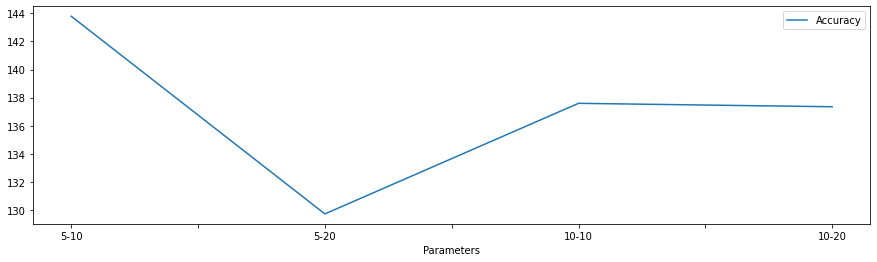

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 20, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Recession_Rate']=y_test_orig
TestingData['Predict_Recession_Rate']=Predictions
TestingData.head()

,Precipitation,Recession_Rate,Predict_Recession_Rate
0,5.551115e-17,0.0,0.079425
1,1.000000e+00,0.0,0.645733
2,5.551115e-17,0.0,0.079425
3,5.551115e-17,0.0,0.079425
4,5.551115e-17,0.0,0.079425


In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Recession_Rate']-TestingData['Predict_Recession_Rate'])/TestingData['Recession_Rate'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: -inf


,Precipitation,Recession_Rate,Predict_Recession_Rate,APE
0,5.551115e-17,0.0,0.079425,inf
1,1.000000e+00,0.0,0.645733,inf
2,5.551115e-17,0.0,0.079425,inf
3,5.551115e-17,0.0,0.079425,inf
4,5.551115e-17,0.0,0.079425,inf


(array([8734.,  365.,  100.,   27.,   20.,    4.,    8.,    3.,    0.,
           0.,    1.,    0.,    1.,    1.,    2.,    0.,    1.,    0.,
           1.,    2.]),
 array([ 0.    ,  2.4625,  4.925 ,  7.3875,  9.85  , 12.3125, 14.775 ,
        17.2375, 19.7   , 22.1625, 24.625 , 27.0875, 29.55  , 32.0125,
        34.475 , 36.9375, 39.4   , 41.8625, 44.325 , 46.7875, 49.25  ]),
 <a list of 20 Patch objects>)

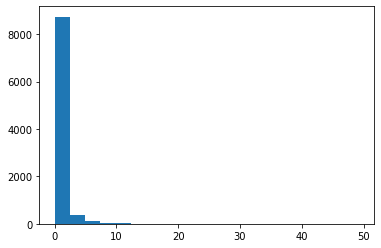

In [ ]:
import matplotlib.pyplot as plt
plt.hist(TestingData['Recession_Rate'], bins = 20)

In [ ]:
import numpy as np
import pandas as pd

data = np.random.randint(5, 95, size=46346)/5000
dfr = pd.DataFrame(data, columns=['column name'])

print(dfr)

       column name
0           0.0092
1           0.0140
2           0.0088
3           0.0084
4           0.0104
...            ...
46341       0.0106
46342       0.0110
46343       0.0010
46344       0.0018
46345       0.0176

[46346 rows x 1 columns]


In [ ]:
df_col_merged = pd.concat([df, dfr], axis=1)

In [ ]:
df_col_merged

,Precipitation,Recession_Rate,column name
0,1,0.00,0.0092
1,1,0.00,0.0140
2,3,0.00,0.0088
3,0,0.00,0.0084
4,0,0.00,0.0104
...,...,...,...
46341,0,0.00,0.0106
46342,1,0.29,0.0110
46343,0,1.01,0.0010
46344,1,0.14,0.0018


In [ ]:
df_col_merged['Predicted_Recession_Rate']=df_col_merged['Recession_Rate']+df_col_merged['column name']

In [ ]:
df_col_merged

,Precipitation,Recession_Rate,column name,Predicted_Recession_Rate
0,1,0.00,0.0092,0.0092
1,1,0.00,0.0140,0.0140
2,3,0.00,0.0088,0.0088
3,0,0.00,0.0084,0.0084
4,0,0.00,0.0104,0.0104
...,...,...,...,...
46341,0,0.00,0.0106,0.0106
46342,1,0.29,0.0110,0.3010
46343,0,1.01,0.0010,1.0110
46344,1,0.14,0.0018,0.1418


In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax= sns.lineplot(x='Datetime', y='Precipitation', data=dfff, color='red')
ax.set_ylabel("Precipitaion",color="red",fontsize=14)
ax1=ax.twinx()
ax1 = sns.lineplot(x='Datetime', y='Recession_Rate', data=dfff)
ax1.set_ylabel("Recessiion Rate",color="blue",fontsize=14)

In [ ]:
from google.colab import files
df_col_merged.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

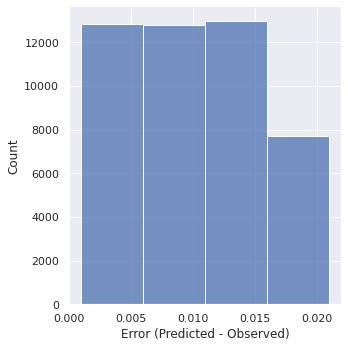

In [ ]:
p=sns.displot(df_col_merged, x="column name", bins=50, binwidth=0.005)
plt.xlabel("Error (Predicted - Observed)")
sns.set(rc={"figure.figsize":(5, 7)}) #width=3, #height=4

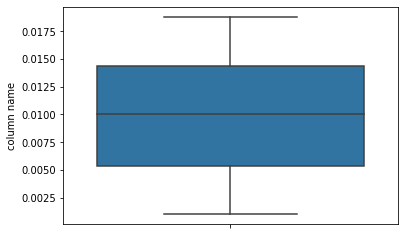

In [ ]:
sns.boxplot( y=df_col_merged["column name"] );
plt.show()